In [137]:
import pandas as pd

df = pd.read_excel('ming_jinshilu_52y_release.xlsx', sheet_name='Ming Jinshi Lists')
df.shape

(14116, 55)

In [138]:
# remove the sources that don't have brother information
df = df[df['出處'] != '萬曆二十七年壬辰科進士履曆便覽']
df = df[df['出處'] != '洪武四年進士登科錄']
df.shape

(13689, 55)

In [139]:
df_subset = df[['CBDB_personid', '進士年份', '姓名', '年齡_Num', '行第', '兄', '弟']].copy()
# combine 兄 and 弟 into brothers by using ； as separator
df_subset['brothers'] = df_subset['兄'].astype(str) + '；' + df_subset['弟'].astype(str)

# remove ； at the beginning or end of the string of brothers
df_subset['brothers'] = df_subset['brothers'].str.replace('；nan$', '')
df_subset['brothers'] = df_subset['brothers'].str.replace('^nan；', '')

# replace nan；nan in brothers with 0
df_subset['brothers'] = df_subset['brothers'].str.replace('nan', '0')
df_subset['兄'] = df_subset['兄'].fillna(0)
df_subset['弟'] = df_subset['弟'].fillna(0)
print(df_subset.shape)
print(df_subset.head())

(13689, 8)
     CBDB_personid  進士年份  姓名  年齡_Num 行第                      兄           弟  \
120          34515  1451  柯潛    29.0  四                      0  江；淦；深 ；混；溫   
121         198136  1451  劉昇    33.0  三                    冕；晟           昱   
122         126815  1451  王㒜    28.0  二  俊；從兄傑（儀真衛副千戶）；倫；侃；□；儒     從弟伸；從弟佩   
123         198137  1451  吳匯    40.0  一                      0       浩瀚；浩瀾   
124         128933  1451  周輿    39.0  二                      軌           轍   

                          brothers  
120                   0；江；淦；深 ；混；溫  
121                          冕；晟；昱  
122  俊；從兄傑（儀真衛副千戶）；倫；侃；□；儒；從弟伸；從弟佩  
123                        0；浩瀚；浩瀾  
124                            軌；轍  


In [140]:
# In brothers, remove ；0 and 0；, and replace 0；0 with 0
df_subset['brothers'] = df_subset['brothers'].str.replace('0；0', '0')
df_subset['brothers'] = df_subset['brothers'].str.replace('；0$', '', regex=True)
df_subset['brothers'] = df_subset['brothers'].str.replace('^0；', '', regex=True)

df_subset['brother_count'] = df_subset['brothers'].apply(lambda x: str(x).count('；')+1 if x != '0' else 0)


In [141]:
# sort 進士年份 from old to new, group it by 10 years, and count the mediam brother_count in each group
df_subset = df_subset.sort_values('進士年份')
df_subset['year_group'] = df_subset['進士年份']//20*20
df_subset_grouped_by_year_group = df_subset.groupby('year_group').agg({'brother_count': 'mean'}).reset_index()
# df_subset_grouped_by_year_group = df_subset.groupby('year_group').agg({'brother_count': 'median'}).reset_index()
# add a column to show the number of people in each group
df_subset_grouped_by_year_group['count'] = df_subset.groupby('year_group').size().values

df_subset_grouped_by_year_group

,year_group,brother_count,count
0,1400,2.0,216
1,1420,2.0,298
2,1440,3.0,1273
3,1460,3.0,1895
4,1480,3.0,1539
5,1500,3.0,1298
6,1520,3.0,1610
7,1540,3.0,2229
8,1560,3.0,2092
9,1580,4.0,1006


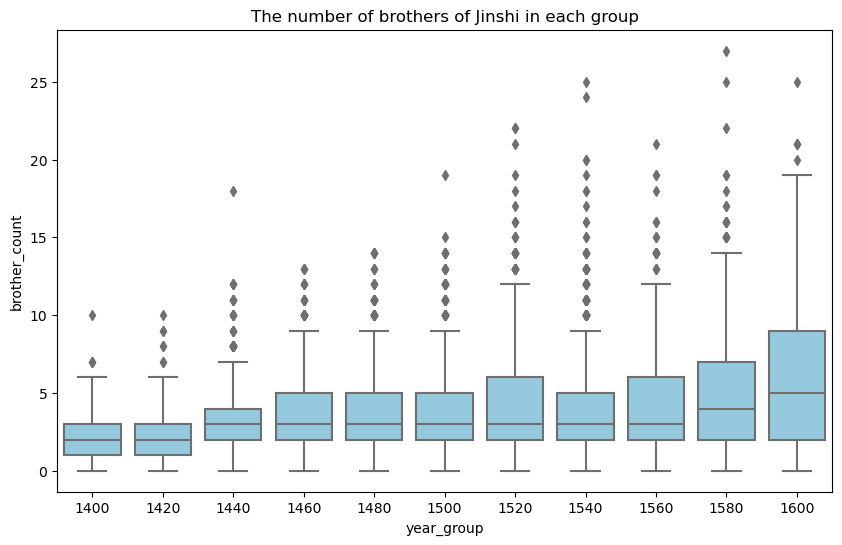

In [142]:
# Draw boxplot based on the grouped data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='year_group', y='brother_count', data=df_subset, color='skyblue')
plt.title('The number of brothers of Jinshi in each group')
# sns.boxplot(x='year_group', y='brother_count', data=df_subset)
plt.show()



In [143]:
# print df_subset.head(50), but brother_count >1
df_subset[df_subset['brother_count']>0].head(50)

,CBDB_personid,進士年份,姓名,年齡_Num,行第,兄,弟,brothers,brother_count,year_group
2855,34471,1400,胡靖,31.0,二,方大,0,方大,1,1400
2936,132576,1400,蔣驥,21.0,二,0,駉；駿,駉；駿,2,1400
2934,200171,1400,汪翁綬,22.0,二,綾,縉,綾；縉,2,1400
2933,130853,1400,陳善,27.0,二,文富,良,文富；良,2,1400
2930,200168,1400,劉永,26.0,四,靖；良；謙,0,靖；良；謙,3,1400
2929,200167,1400,鄭鎬,30.0,三,鉉,0,鉉,1,1400
2928,200166,1400,劉虬,26.0,四,0,蟠；蠡,蟠；蠡,2,1400
2927,200165,1400,徐新,34.0,六,德惟,0,德惟,1,1400
2937,200173,1400,葉瑄,26.0,三,儒生,文生,儒生；文生,2,1400
2925,200163,1400,李瑀,35.0,一,0,璣；源；林,璣；源；林,3,1400


In [144]:
# Count the sum of 0 of brother_count in each group
df_subset['zero_brother_count'] = df_subset['brother_count'].apply(lambda x: 1 if x==0 else 0)
df_subset_grouped_by_zero = df_subset.groupby('year_group').agg({'zero_brother_count': 'sum'}).reset_index()
df_subset_grouped_by_zero

,year_group,zero_brother_count
0,1400,41
1,1420,27
2,1440,82
3,1460,111
4,1480,113
5,1500,76
6,1520,99
7,1540,166
8,1560,149
9,1580,54


In [145]:
df_subset

,CBDB_personid,進士年份,姓名,年齡_Num,行第,兄,弟,brothers,brother_count,year_group,zero_brother_count
2855,34471,1400,胡靖,31.0,二,方大,0,方大,1,1400,0
2936,132576,1400,蔣驥,21.0,二,0,駉；駿,駉；駿,2,1400,0
2935,200172,1400,劉迪簡,30.0,一,0,0,0,0,1400,1
2934,200171,1400,汪翁綬,22.0,二,綾,縉,綾；縉,2,1400,0
2933,130853,1400,陳善,27.0,二,文富,良,文富；良,2,1400,0
...,...,...,...,...,...,...,...,...,...,...,...
13378,207652,1610,區龍禎,35.0,一,0,龍祥（庠生）；景賢（庠生）；孔柱；鳳禎（庠生）,龍祥（庠生）；景賢（庠生）；孔柱；鳳禎（庠生）,4,1600,0
13379,207653,1610,莊起元,35.0,二,起蒙（庠生）,廷臣（同科會試禮部精綬司事）；廷弼；起光（把總）；鳴謙（丙午撝乙卯亞□□□舉人）,起蒙（庠生）；廷臣（同科會試禮部精綬司事）；廷弼；起光（把總）；鳴謙（丙午撝乙卯亞□□□舉人）,5,1600,0
13380,207654,1610,馬斯和,35.0,三,斯臧（庠生）；斯才；斯作；斯徂；斯征；斯健；斯立；斯行,0,斯臧（庠生）；斯才；斯作；斯徂；斯征；斯健；斯立；斯行,8,1600,0
13364,207640,1610,郭志仁,37.0,一,0,志礼,志礼,1,1600,0


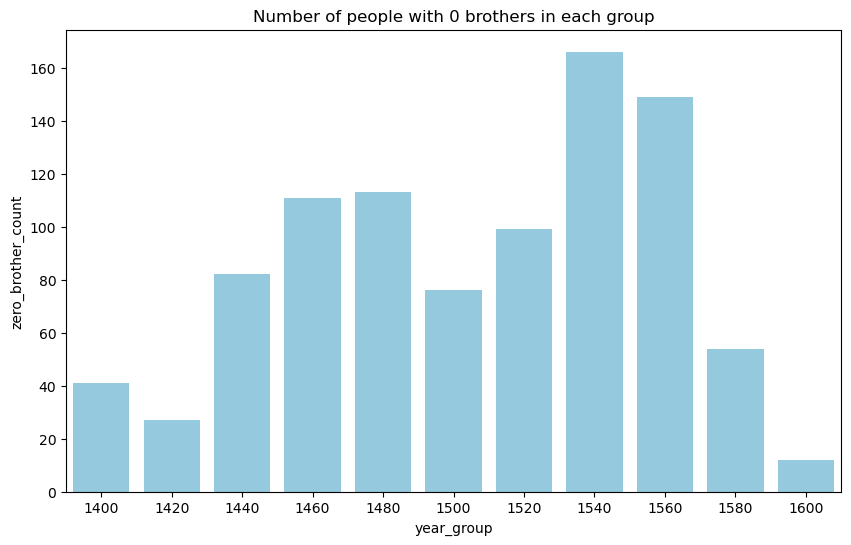

In [146]:
# visualize df_subset_grouped_by_zero
plt.figure(figsize=(10, 6))
sns.barplot(x='year_group', y='zero_brother_count', data=df_subset_grouped_by_zero, color='skyblue')
plt.title('Number of people with 0 brothers in each group')
plt.show()

In [147]:
# Read 行第_number.csv, and great 行第_number column
df_hangdi = pd.read_csv('行第_number.csv', encoding='utf-8-sig')

# useing this mapping table to create a new column 行第_number in df_subset
df_subset = df_subset.merge(df_hangdi, on='行第', how='left')
df_subset

,CBDB_personid,進士年份,姓名,年齡_Num,行第,兄,弟,brothers,brother_count,year_group,zero_brother_count,行第_number
0,34471,1400,胡靖,31.0,二,方大,0,方大,1,1400,0,2.0
1,34471,1400,胡靖,31.0,二,方大,0,方大,1,1400,0,2.0
2,34471,1400,胡靖,31.0,二,方大,0,方大,1,1400,0,2.0
3,132576,1400,蔣驥,21.0,二,0,駉；駿,駉；駿,2,1400,0,2.0
4,132576,1400,蔣驥,21.0,二,0,駉；駿,駉；駿,2,1400,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40765,207640,1610,郭志仁,37.0,一,0,志礼,志礼,1,1600,0,1.0
40766,207683,1610,王世蔭,33.0,一,世芳（廩生）,世祚（廩生）；建忠（舉人）；世衡（貢生）；世泰（貢生）；世臨（貢生）,世芳（廩生）；世祚（廩生）；建忠（舉人）；世衡（貢生）；世泰（貢生）；世臨（貢生）,6,1600,0,1.0
40767,207683,1610,王世蔭,33.0,一,世芳（廩生）,世祚（廩生）；建忠（舉人）；世衡（貢生）；世泰（貢生）；世臨（貢生）,世芳（廩生）；世祚（廩生）；建忠（舉人）；世衡（貢生）；世泰（貢生）；世臨（貢生）,6,1600,0,1.0
40768,207683,1610,王世蔭,33.0,一,世芳（廩生）,世祚（廩生）；建忠（舉人）；世衡（貢生）；世泰（貢生）；世臨（貢生）,世芳（廩生）；世祚（廩生）；建忠（舉人）；世衡（貢生）；世泰（貢生）；世臨（貢生）,6,1600,0,1.0


In [148]:
# print the unique numbers of 行第_number, and the frequency of each number
df_subset['行第_number'].value_counts()



行第_number
1.0      20120
2.0       9000
3.0       5733
5.0       1962
6.0       1092
         ...  
137.0        1
107.0        1
87.0         1
204.0        1
72.0         1
Name: count, Length: 112, dtype: int64

In [149]:
# for df_subset['行第_number'].value_counts(), only shows counts > 3
df_subset['行第_number'].value_counts()[df_subset['行第_number'].value_counts()>3]


行第_number
1.0      20120
2.0       9000
3.0       5733
5.0       1962
6.0       1092
4.0       1016
7.0        278
10.0       261
8.0        204
9.0        173
999.0       80
11.0        73
12.0        57
14.0        51
15.0        36
17.0        34
18.0        28
19.0        27
20.0        24
13.0        22
16.0        21
21.0        15
23.0        15
28.0        14
24.0        13
22.0        13
25.0        13
26.0        12
31.0        12
38.0        11
27.0        10
30.0        10
39.0        10
36.0        10
29.0         9
35.0         7
43.0         7
34.0         7
42.0         7
33.0         7
37.0         7
41.0         6
60.0         6
50.0         6
32.0         6
45.0         6
61.0         5
63.0         5
40.0         5
55.0         5
68.0         4
46.0         4
48.0         4
73.0         4
47.0         4
Name: count, dtype: int64

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 34892 (\N{CJK UNIFIED IDEOGRAPH-884C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 31532 (\N{CJK UNIFIED IDEOGRAPH-7B2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


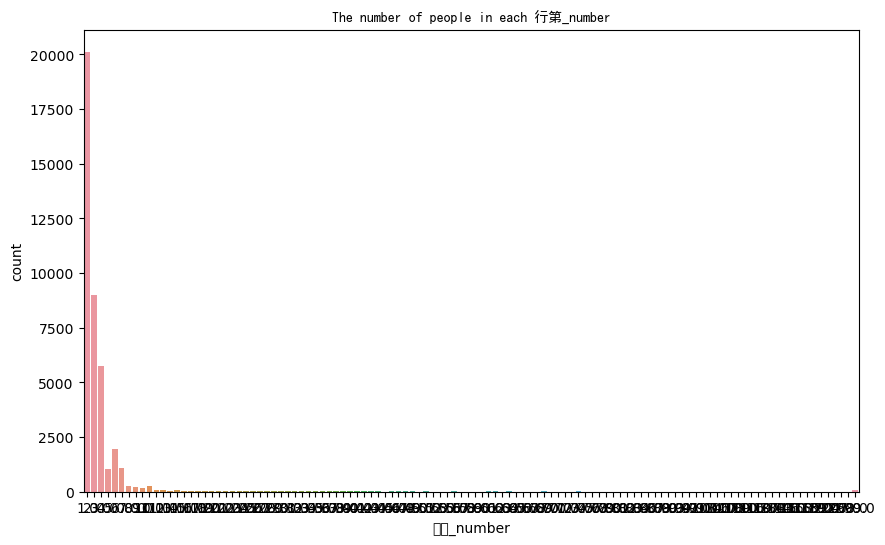

In [150]:
# Draw a histogram of the number of 行第_number
plt.figure(figsize=(10, 6))
sns.countplot(x='行第_number', data=df_subset)
plt.title('The number of people in each 行第_number', fontproperties='SimHei')

plt.show()

In [151]:
# Calculate the mean of 行第_number in each group, 
df_hangdi_no_na = df_subset.copy()
df_hangdi_no_na = df_hangdi_no_na.dropna(subset=['行第_number'])
# df_hangdi_no_na['行第_number'] = df_hangdi_no_na['行第_number'].fillna(1)
# df_hangdi_no_na = df_hangdi_no_na[df_hangdi_no_na['行第_number']!=999]
df_hangdi_no_na = df_hangdi_no_na[df_hangdi_no_na['行第_number'].isin(df_subset['行第_number'].value_counts()[df_subset['行第_number'].value_counts()>5].index)]
# df_hangdi_no_na_grouped = df_hangdi_no_na.groupby('year_group').agg({'行第_number': 'mean'}).reset_index()
df_hangdi_no_na_grouped = df_hangdi_no_na.groupby('year_group').agg({'行第_number': 'median'}).reset_index()
# calcualte df_hangdi_no_na_grouped by the most frequent 行第_number in each group
# df_hangdi_no_na_grouped = df_hangdi_no_na.groupby('year_group')['行第_number'].agg(lambda x: x.mode().iloc[0]).reset_index()



df_hangdi_no_na_grouped

,year_group,行第_number
0,1400,2.0
1,1420,2.0
2,1440,2.0
3,1460,2.0
4,1480,1.0
5,1500,2.0
6,1520,1.0
7,1540,1.0
8,1560,1.0
9,1580,1.0


In [152]:
# print unique values of 行第_number in df_hangdi_no_na
df_hangdi_no_na['行第_number'].value_counts()

行第_number
1.0      20120
2.0       9000
3.0       5733
5.0       1962
6.0       1092
4.0       1016
7.0        278
10.0       261
8.0        204
9.0        173
999.0       80
11.0        73
12.0        57
14.0        51
15.0        36
17.0        34
18.0        28
19.0        27
20.0        24
13.0        22
16.0        21
23.0        15
21.0        15
28.0        14
25.0        13
22.0        13
24.0        13
31.0        12
26.0        12
38.0        11
36.0        10
30.0        10
39.0        10
27.0        10
29.0         9
37.0         7
34.0         7
35.0         7
43.0         7
33.0         7
42.0         7
45.0         6
60.0         6
50.0         6
32.0         6
41.0         6
Name: count, dtype: int64

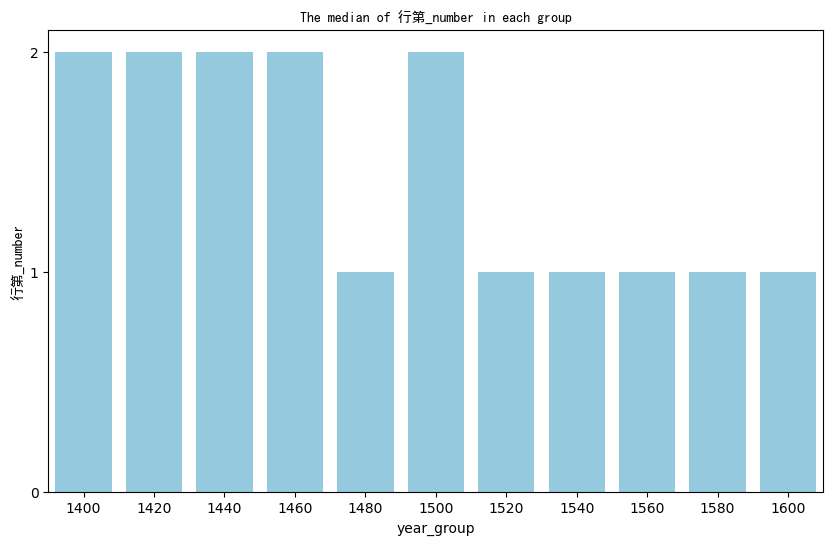

In [153]:
plt.figure(figsize=(10, 6))
sns.barplot(x='year_group', y='行第_number', data=df_hangdi_no_na_grouped, color='skyblue')
plt.yticks([0, 1, 2])
plt.ylabel('行第_number', fontproperties='SimHei')
plt.title('The median of 行第_number in each group', fontproperties='SimHei')
plt.show()
